# Анализ продаж видеоигр

<hr style="border: 2px solid blue;" />

## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нам нужно выявить определяющие успешность игры закономерности. 

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные за 2016 год на основании которых нам необходимо составить прогноз на 2017 год.

## Изучение общей информации

<hr style="border: 2px solid blue;" />

In [31]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/datasets/games.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [34]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [35]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [36]:
df.duplicated().sum()

0

При осмотре данных дубликатов не обнаружено, однако имеется большое количество пропусков в столбцах года выпуска игра, рейтингу критиков, пользователей и рейтинге по международной классификации.
Вероятно, по не особо популярным релизам информация в базе данных отсутствует

## Подготовка данных

<hr style="border: 2px solid blue;" />

In [37]:
display(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [38]:
df.columns = df.columns.str.lower()

In [39]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [40]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()


df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())

df.loc[df['user_score'] == "tbd", 'user_score'] = 'NaN'
df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())

df['rating'] = df['rating'].fillna('undefined')

In [41]:
# example
df['user_score'].astype('float').fillna(df['user_score'].mean())

0        8.000000
1        7.125046
2        8.300000
3        8.000000
4        7.125046
           ...   
16710    7.125046
16711    7.125046
16712    7.125046
16713    7.125046
16714    7.125046
Name: user_score, Length: 16715, dtype: float64

In [42]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined


Все наши действия выше по замене пропусков в столбцах с рейтингом были призваны дать возможность удалить пропуски в столбце с годом релиза игры, поскольку в дальнейшем нам этот столбец нам понадобится и оставлять его с пропусками не очень хорошо для нас. 


Заменив нулями rating пропуски, мы ничего не лишаемся, поскольку по-прежнему понятно, что данные с нулями в этих столбцах получены в связи с отсутствием информации о рейтинге.

In [43]:
df = df.dropna().reset_index()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
index              16444 non-null int64
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [45]:
df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined
2,2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined


In [46]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = df['year_of_release'].dt.year

df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined


In [47]:
df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined


Тип столбца year_of_release был преобразован в datetime, 
так как в нашем будущем анализе может быть важно проводить операции с данным столбцом.

Аббревиатура "tbd" (в столбце user_score) означает неизвестное значение, которое должно быть заполнено позднее.
Я обработал его заменив обычным пропуском для дальнейшего заполнения.

In [48]:
df['income'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined,40.24
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined,31.38


## Исследовательский анализ данных

<hr style="border: 2px solid blue;" />

In [49]:
df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68.967679,7.125046,undefined,40.24
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,68.967679,7.125046,undefined,31.38


[Text(0, 0.5, 'Количество релизов в год'),
 Text(0.5, 0, 'Год'),
 Text(0.5, 1.0, 'График релизов по годам')]

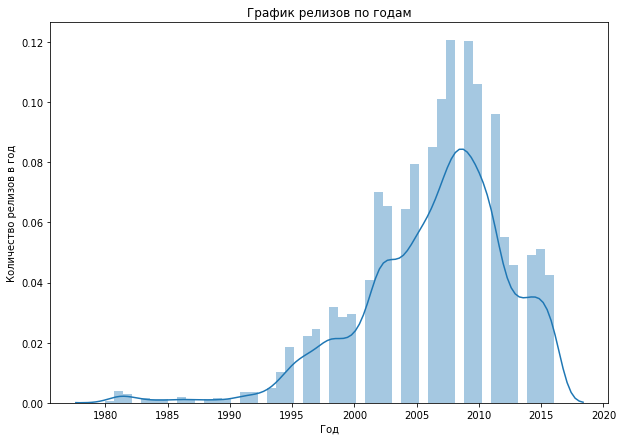

In [50]:
plt.figure(figsize=(10,7))
sns.distplot(df['year_of_release'], bins=50).set(title='График релизов по годам', xlabel='Год', ylabel='Количество релизов в год')

На графике мы видим, что докризисный период знаменует собой бурный рост индустрии видеоигр, однако наш период для анализа - это последние 5 лет (2012-2016), поскольку общая обстановка на рынке по релизам похожа от года к году в течение данного периода. Соответственно, можно проводить анализ и прогнозировать следующие периоды.

In [51]:
#считаем количество релизов по годам
year_releases = pd.pivot_table(df, 
                               index='year_of_release', 
                               values='name', 
                               aggfunc='count').reset_index()
display(year_releases)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [52]:
#платформы и продажи
platform_income = pd.pivot_table(df, 
                                 index='platform', 
                                 values='income', 
                                 aggfunc='sum').reset_index()
display(platform_income.sort_values('income'))

,platform,income
14,pcfx,0.03
9,gg,0.04
1,3do,0.10
24,tg16,0.16
27,ws,1.42
12,ng,1.44
22,scd,1.86
3,dc,15.95
8,gen,28.35
21,sat,33.59


Берем 6 последних платформ для анализа на предмет вычисления периода популярности

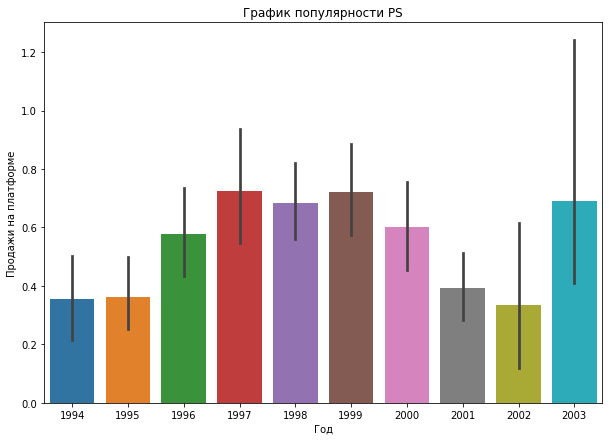

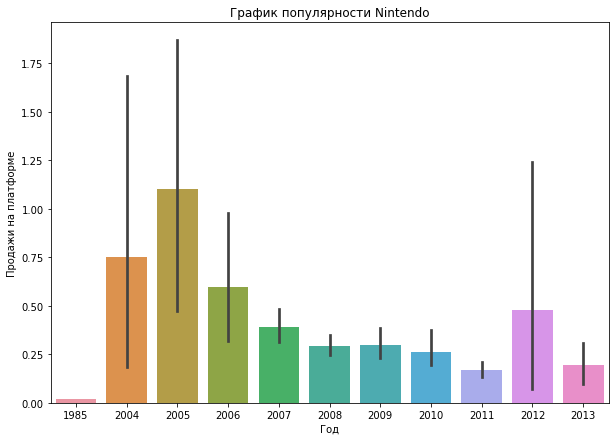

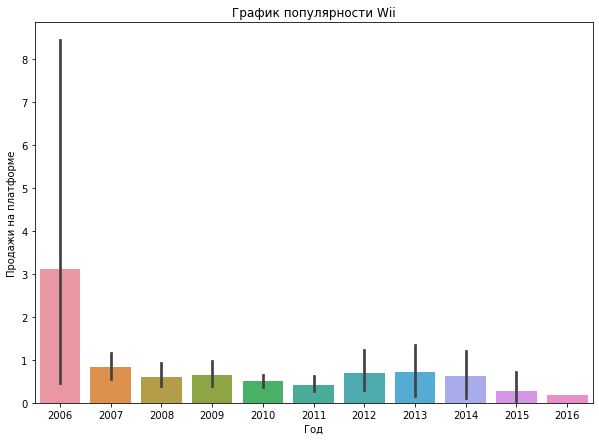

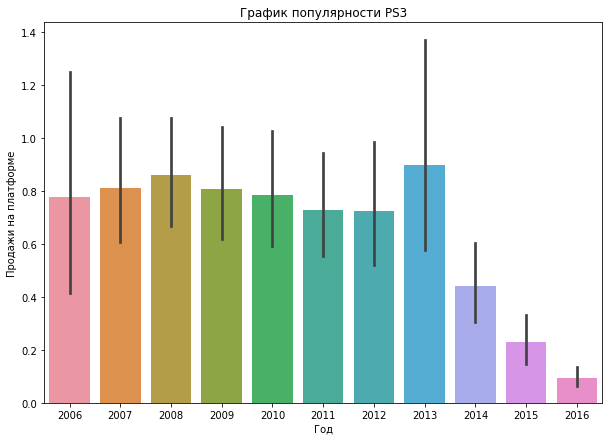

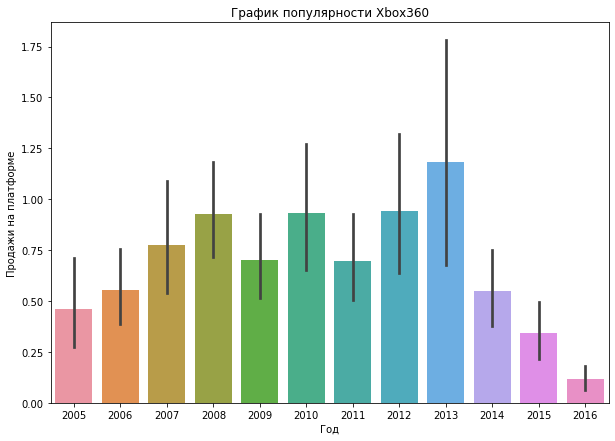

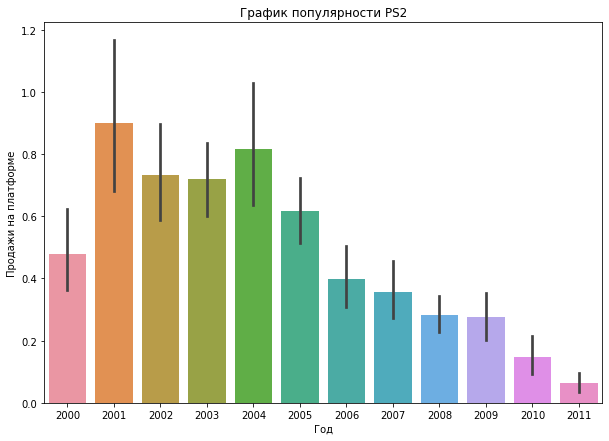

In [53]:
ps = df.query('platform == "ps"')
ds = df.query('platform == "ds"')
wii = df.query('platform == "wii"')
ps3 = df.query('platform == "ps3"')
x360 = df.query('platform == "x360"')
ps2 = df.query('platform == "ps2"')

platform_list = {'PS':ps, 'Nintendo':ds, 'Wii':wii, 'PS3':ps3, 'Xbox360':x360, 'PS2':ps2}

for name, value in platform_list.items():
    title_platform='График популярности ' + name
    plt.figure(figsize=(10,7))
    sns.barplot(data=value, x='year_of_release', y='income').set(title=title_platform, xlabel='Год', ylabel='Продажи на платформе')
    plt.show()

Как видно из графиков, в отдельных случаях популярность платформы может длиться всего год.

Однако, в среднем, платформы ранних поколений в среднем такие, как PS и PS2 популярны около 5-6 лет, затем следует снижение продаж.

Популярность более поздних поколений платформ - PS3 и Xbox360 длилась намного больше их предшественниц - 8-9 лет. Это может быть связано с выпуском разных версий платформ и их модернизацией под запросы времени.

Поскольку большинство продаж среди самых популярных консолей принадлежит Xbox и ps, нам следует обратить внимание на следующее поколение этих консолей, поскольку Xbox360 и PS3 уже прожили свой пик популярности.

In [54]:
#считаем релизы в контексте платформ
platform_5y = df.query('year_of_release >= 2012')
platform = pd.pivot_table(platform_5y, 
                             index=['platform'],
                             values='income',
                             aggfunc='count').sort_values('income').reset_index()
display(platform)

,platform,income
0,ds,31
1,wii,54
2,wiiu,147
3,psp,173
4,xone,247
5,pc,250
6,x360,292
7,ps4,392
8,3ds,396
9,psv,411


Text(0, 0.5, 'Доход')

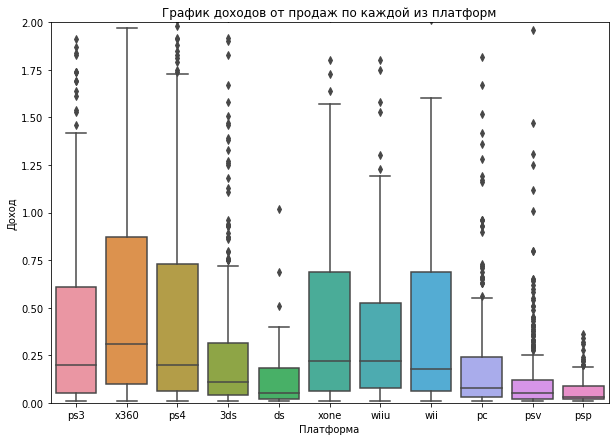

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(x=platform_5y['platform'], y=platform_5y['income']).set(ylim=(0,2))
plt.title('График доходов от продаж по каждой из платформ')
plt.xlabel('Платформа')
plt.ylabel('Доход')

С 2012 года сохраняют свою популярность консоли третьего поколения, однако перспективные платформы нового поколения как PS4 и Xbox One уже имеют большой хвост в сторону больших значений выручки и вскоре могут перегнать по продажам консоли третьего поколения. 

ПК остается на низком уровне по продажам.

In [57]:
corr_df = platform_5y.query('platform == "ps4"')
ps4_corr = corr_df[['critic_score', 'user_score', 'income']].corr()

display("Корреляция PS4", ps4_corr)

'Корреляция PS4'

,critic_score,user_score,income
critic_score,1.00000,0.513400,0.349010
user_score,0.51340,1.000000,-0.045391
income,0.34901,-0.045391,1.000000


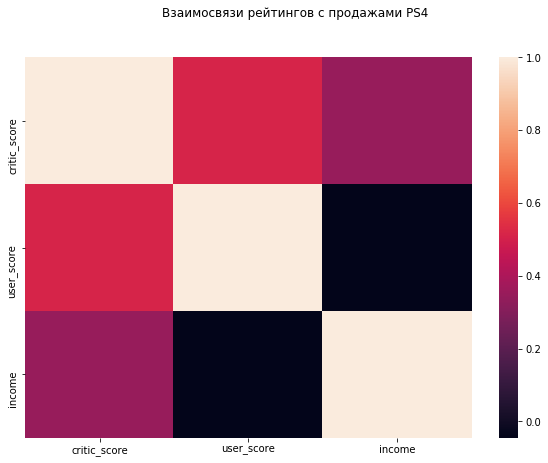

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(ps4_corr)
plt.suptitle('Взаимосвязи рейтингов с продажами PS4')
plt.show()

Обнаружена крайне слабая отрицательная зависимость пользовательского рейтинга и продаж, а также средняя зависимость рейтинга критиков с продажами на платформе.

Рассмотрим вывод на примере корреляции по другим платформам

In [27]:
ps3 = platform_5y.query('platform == "ps3"')
ps3_corr = ps3[['critic_score', 'user_score', 'income']].corr()

display("Корреляция PS3", ps3_corr)

'Корреляция PS3'

,critic_score,user_score,income
critic_score,1.000000,0.396384,0.335720
user_score,0.396384,1.000000,-0.057529
income,0.335720,-0.057529,1.000000


In [28]:
psp = platform_5y.query('platform == "psp"')
psp_corr = psp[['critic_score', 'user_score', 'income']].corr()

display("Корреляция PSP", psp_corr)

'Корреляция PSP'

,critic_score,user_score,income
critic_score,1.000000,0.207725,0.091510
user_score,0.207725,1.000000,-0.251851
income,0.091510,-0.251851,1.000000


In [29]:
wii = platform_5y.query('platform == "wii"')
wii_corr = wii[['critic_score', 'user_score', 'income']].corr()

display("Корреляция Wii", wii_corr)

'Корреляция Wii'

,critic_score,user_score,income
critic_score,1.000000,0.178168,0.379920
user_score,0.178168,1.000000,-0.019465
income,0.379920,-0.019465,1.000000


In [30]:
x360 = platform_5y.query('platform == "x360"')
x360_corr = x360[['critic_score', 'user_score', 'income']].corr()

display("Корреляция Xbox360", x360_corr)

'Корреляция Xbox360'

,critic_score,user_score,income
critic_score,1.000000,0.430835,0.341724
user_score,0.430835,1.000000,-0.021819
income,0.341724,-0.021819,1.000000


При рассмотрении взаимосвязей по другим платформам обнаружено следующее: чем менее популярна платформа - тем более пользовательский рейтинг влияет на продажи по сравнению с рейтингом критиков.

А также чем более популярна платформа, тем более рейтинг критиков влияет на продажи по сравнению с рейтингом пользователей.

По PSP обнаружена слабая отрицательная зависимость рейтинга пользователей к продажам.

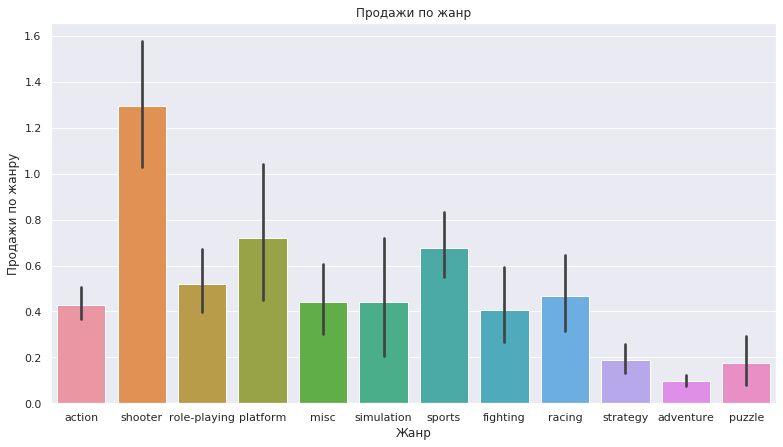

In [61]:
plt.figure(figsize=(13,7))
genre = sns.barplot(data=platform_5y, x='genre', y='income')
sns.set(rc={'figure.figsize':(15,9)})
genre.set(title='Продажи по жанр', xlabel='Жанр', ylabel='Продажи по жанру')

plt.show()

Среди продаж по жанрам самыми прибыльными являются - Sports, Platform, Shooter.

Самыми низкими по продажам являются жанры - Strategy, Adventure

Эти жанры сильно выделяются на фоне остальных, в особенности жанр Shooter
Можно сказать, что пользователям больше по душе наиболее активные игры.

## Портрет пользователя каждого региона

<hr style="border: 2px solid blue;" />

In [32]:
platform_5y.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
16,16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
31,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,undefined,14.63
33,33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,68.967679,7.125046,undefined,14.60
34,34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79


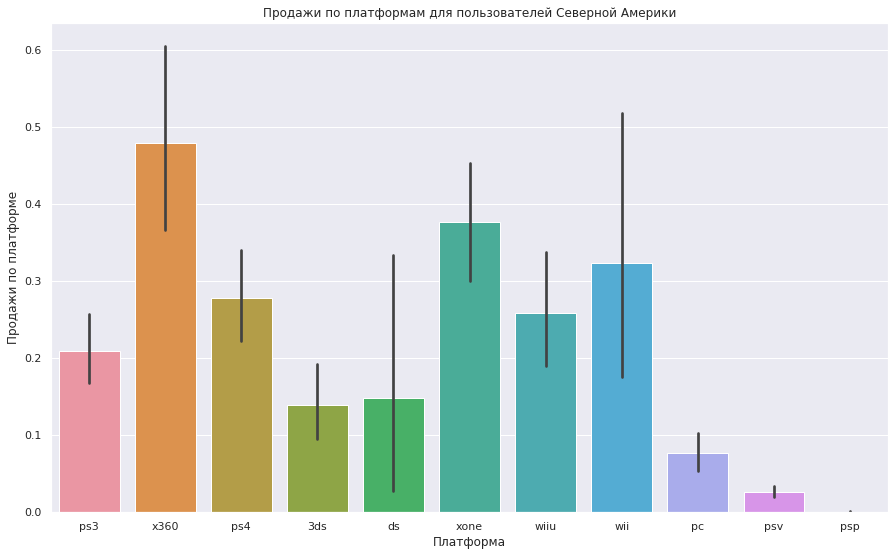

In [33]:
ax = sns.barplot(data=platform_5y, x='platform', y='na_sales')
sns.set(rc={'figure.figsize':(10,7)})

ax.set(title='Продажи по платформам для пользователей Северной Америки', xlabel='Платформа', ylabel='Продажи по платформе')

plt.show()

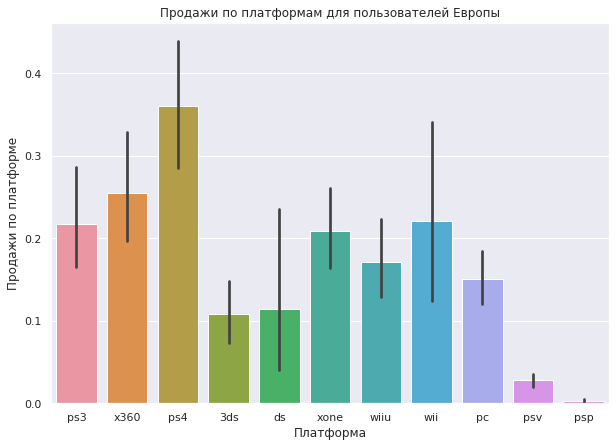

In [34]:
ax = sns.barplot(data=platform_5y, x='platform', y='eu_sales')
sns.set(rc={'figure.figsize':(10,7)})

ax.set(title='Продажи по платформам для пользователей Европы', xlabel='Платформа', ylabel='Продажи по платформе')

plt.show()

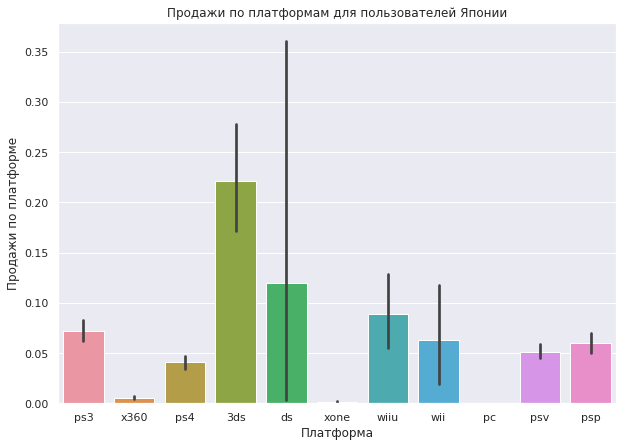

In [35]:
ax = sns.barplot(data=platform_5y, x='platform', y='jp_sales')
sns.set(rc={'figure.figsize':(10,7)})

ax.set(title='Продажи по платформам для пользователей Японии', xlabel='Платформа', ylabel='Продажи по платформе')

plt.show()

In [36]:
#топ платформ для Северной Америки
na_top_platforms = platform_5y.groupby('platform')['na_sales'].agg('sum')
na_top5 = na_top_platforms.sort_values(ascending=False).head(5)

print(na_top5)

platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      55.31
Name: na_sales, dtype: float64


In [37]:
#топ платформ для Европы
eu_top_platforms = platform_5y.groupby('platform')['eu_sales'].agg('sum')
eu_top5 = eu_top_platforms.sort_values(ascending=False).head(5)

print(eu_top5)

platform
ps4     141.09
ps3     106.86
x360     74.52
xone     51.59
3ds      42.64
Name: eu_sales, dtype: float64


In [38]:
#топ платформ для Японии
jp_top_platforms = platform_5y.groupby('platform')['jp_sales'].agg('sum')
jp_top5 = jp_top_platforms.sort_values(ascending=False).head(5)

print(jp_top5)

platform
3ds     87.79
ps3     35.29
psv     21.04
ps4     15.96
wiiu    13.01
Name: jp_sales, dtype: float64


В Европе и Америке практически весь топ занимают Xbox и PlayStation, лидер в Америке - Xbox, в Европе - PS, Nintendo в обоих случаях замыкает пятерку.

А вот в Японии топ платформ очень отличается - Nintendo занимает первое место, три следующие позиции принадлежат PS, а замыкает Wiiu. Бытует мнение, что Япония - это другой мир :) Видимо, так оно и есть.

In [39]:
#топ жанров для Северной Америки
na_top_genres = platform_5y.groupby('genre')['na_sales'].agg('sum')
na_top5_genres = na_top_genres.sort_values(ascending=False).head(5)

print(na_top5_genres)

genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
Name: na_sales, dtype: float64


In [40]:
#топ жанров для Европы
eu_top_genres = platform_5y.groupby('genre')['eu_sales'].agg('sum')
eu_top5_genres = eu_top_genres.sort_values(ascending=False).head(5)

print(eu_top5_genres)

genre
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29
Name: eu_sales, dtype: float64


In [41]:
#топ жанров для Японии
jp_top_genres = platform_5y.groupby('genre')['jp_sales'].agg('sum')
jp_top5_genres = jp_top_genres.sort_values(ascending=False).head(5)

print(jp_top5_genres)

genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64


Топ жанров по доходам в Америке и Европе очень похож и за исключением пятой позиции почти не отличается.
А вот в Японии на первых трех местах стоит не action, shooter, sports, а role-playing, action, misc.

Такое различие может быть связано с тем, что в таких жанрах в Японии множество игр выпускаются их национальными разработчиками, тогда как Европа и Америка потребляет не только национальные игры, но и любые другие.

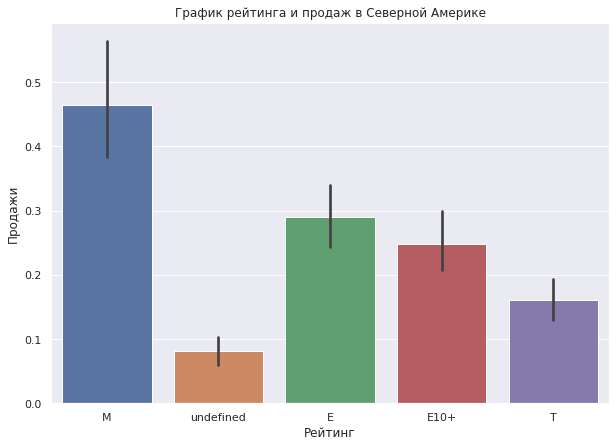

In [42]:
#создаем распределение рейтинга и продаж
sns.barplot(data=platform_5y, x='rating', y='na_sales').set(title='График рейтинга и продаж в Северной Америке',
                                                            xlabel='Рейтинг',
                                                            ylabel='Продажи')
plt.show()

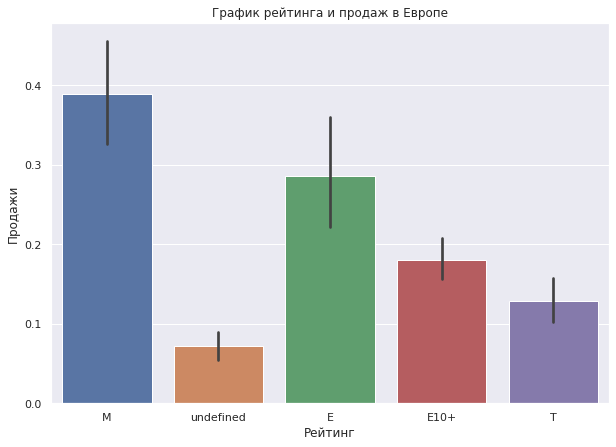

In [43]:
sns.barplot(data=platform_5y, x='rating', y='eu_sales').set(title='График рейтинга и продаж в Европе',
                                                            xlabel='Рейтинг',
                                                            ylabel='Продажи')
plt.show()

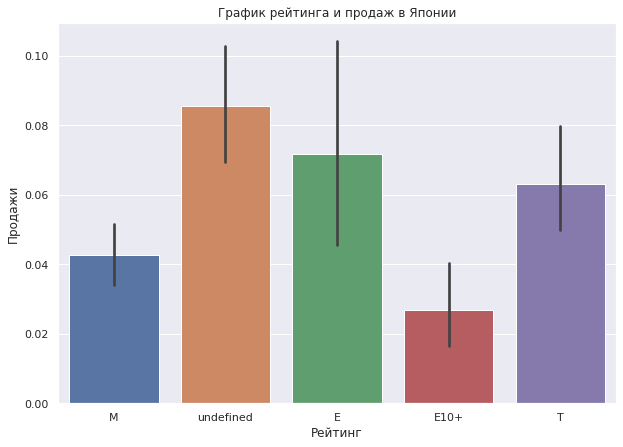

In [44]:
sns.barplot(data=platform_5y, x='rating', y='jp_sales').set(title='График рейтинга и продаж в Японии',
                                                            xlabel='Рейтинг',
                                                            ylabel='Продажи')
plt.show()

Как видно из графиков продаж в зависимости от рейтинга по каждому региону прослеживается следующее:

В Европе и Америке рейтинг существенно влияет на продажи игр. 
1. Чем большему количеству лиц по рейтингу доступна игра, тем выше ее продажи.
2. А также, чем игра более открыта к реалистичности происходящего, включая сцены насилия и сквернословие, тем большую популярность она приобретает, поскольку рейтинг М допускает к покупке аудиторию 17+ лет и именно он лидирует по продажам среди всех остальных.

В Японии же наибольшую популярность имеют игры с неопределенным рейтингом, а также игры доступные для каждого, либо же 13+ лет. Можно сказать, что в Японии абсолютно точно свои вкусы на все, и это требует дополнительного изучения.

Из проведенного анализа можно сделать вывод, что рейтинг определенно влияет на продажи.

## Проверка гипотез

<hr style="border: 2px solid blue;" />

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - пользовательские рейтинги Xbox One и PC равны (задана по общему правилу)

Альтернативная гипотеза - пользовательские рейтинги Xbox One и PC отличаются

In [45]:
xone_score = platform_5y[platform_5y['platform'] == 'xone']['user_score']
pc_score = platform_5y[platform_5y['platform'] == 'pc']['user_score']


xone_var = np.var(xone_score, ddof=1)
pc_var = np.var(pc_score, ddof=1)

print('Дисперсия Xbox One:', xone_var)
print('Дисперсия PC:', pc_var)

results = st.ttest_ind(xone_score, pc_score, equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза подтверждена')

Дисперсия Xbox One: 1.4740531466415872
Дисперсия PC: 2.3515038897223457
p-значение: 0.2984368020965234
Нулевая гипотеза подтверждена


Поскольку нулевая гипотеза подтверждена - пользовательские рейтинги двух платформ могут быть равны.

### Средние пользовательские рейтинги жанров Action  и Sports разные

Нулевая гипотеза - пользовательские рейтинги жанров Action и Sports равны (задана по общему правилу)

Альтернативная гипотеза - пользовательские рейтинги жанров Action и Sports отличаются

In [46]:
action_score = platform_5y[platform_5y['genre'] == 'action']['user_score']
sports_score = platform_5y[platform_5y['genre'] == 'sports']['user_score']

action_var = np.var(action_score, ddof=1)
sports_var = np.var(sports_score, ddof=1)

print('Дисперсия Action:', action_var)
print('Дисперсия Sports:', sports_var)

results = st.ttest_ind(action_score, sports_score, equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза подтверждена')

Дисперсия Action: 0.9798972840341581
Дисперсия Sports: 2.750651771754206
p-значение: 9.330082550071701e-21
Нулевая гипотеза отвергнута


Поскольку нулевая гипотеза отвергнута, имеет место быть альтернативная гипотеза, а стало быть - пользовательские рейтинги двух жанров могут отличаться.

Мною был выбран стандартный критерий критической величины для проверки этих гипотез.

Ddof параметр выбран мною исходя из стандартного значения по госту.

Параметр equal_Var был выбран в качестве False в связи с отличием дисперсий каждых двух выборок.

## Выводы

<hr style="border: 2px solid blue;" />

Поскольку консоли нового поколения PS4, Xbox One могут жить значительно дольше, чем первые поколения, можно сделать ставку на продаже игр для этих платформ, поскольку в следующие годы их популярность падать не будет.

Также из исследования становится ясно, 
что большинство продаж видеоигр приходится на два региона из трех - это Северная Америка и Европа, 
а в этих регионах наиболее популярными являются игры жанров shooter, action и sports.
Продажи этих трех жанров будут наибольшими в следующие годы.

Также игры рейтингов M и E являются наиболее популярными в двух регионах из трех.


Говоря о статистическом пользователе каждого из регионов можно сказать, что предпочтения пользователей из Северной Америки и Европы схожи, на эти регионы приходится большинство продаж.

Среднестатистический пользователь этих регионов предпочитает активные игры жанров Shooter, Action and Sports, а также игры рейтинга M или E и предпочитает играть на следующих платформах: Xbox 360, PS3, PS4, Xbox One.

Среднестатистический игрок же Японии предпочитает игры жанров role-playing, action, misc поскольку многие из этих игр производятся национальными разработчиками, также предпочитают игры рейтинга Е, Т и М и играют в основном на платформах Nintendo, PS3, PS Vita, PS4 и Wiiu, вполне возможно, также по национальным причинам.

Также в моем исследовании я прихожу к выводу, что в наибольшей степени продажи видеоигр могут зависеть от рейтинга критиков, однако его влияние ограничивается 35%.